# Entregável 1 - visão computacional

In [1]:

%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 2.4.11 


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240L, 320L, 3L)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

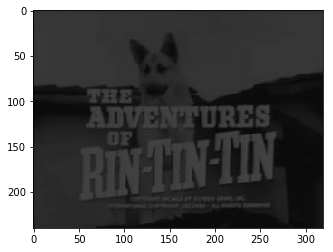

In [5]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

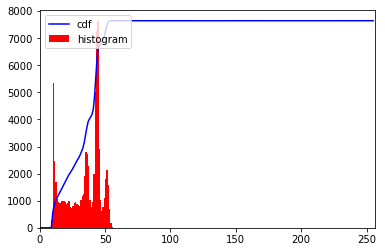

In [6]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

1: O histograma não aproveita bem as faixas de cores, considerando que todos os valores encontrados na imagem estão localizados aproximadamente entre 5 e 50.


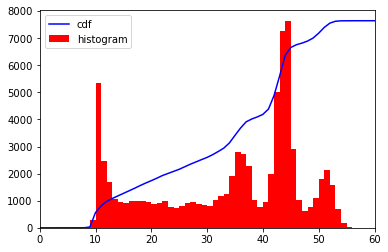

In [7]:
#2 e 3:

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,60])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul? 

Resposta: Não, considerando que o histograma não fornece a posição das cores que ele identifica, apenas a frequência com que uma certa intensidade de cor é encontrada.

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [32]:
img = cv2.imread('hall_box_battery1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print img.shape

imgRed = img[:,:,0]

imgBlue = img[:,:,2]

(3006L, 5344L, 3L)


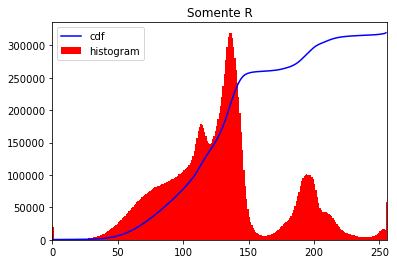

In [33]:
histRed,binsRed = np.histogram(imgRed.flatten(),256,[0,256])

cdfRed = histRed.cumsum()
cdfRed_normalized = cdfRed * histRed.max()/ cdfRed.max()

plt.plot(cdfRed_normalized, color = 'b')
plt.hist(imgRed.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.title('Somente R')
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

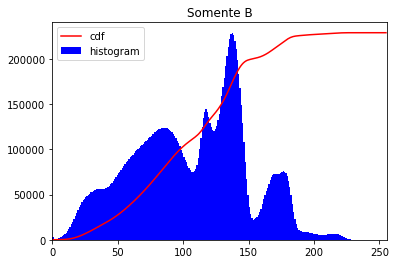

In [34]:
histBlue,binsBlue = np.histogram(imgBlue.flatten(),256,[0,256])

cdfBlue = histBlue.cumsum()
cdfBlue_normalized = cdfBlue * histBlue.max()/ cdfBlue.max()

plt.plot(cdfBlue_normalized, color = 'r')
plt.hist(imgBlue.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.title('Somente B')
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

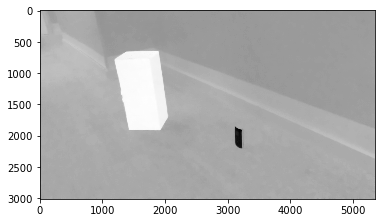

In [41]:
imgNova = img

imgNova = imgRed - 0.99*imgBlue

plt.imshow(imgNova, cmap="Greys_r")